In [1]:
import pandas as pd

## Prep data

In [2]:
df = pd.read_csv("churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [7]:
df.dtypes # note that some numerical values are stored as objects - e.g. totalcharges, monthlycharges

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [8]:
categorical_cols = list(df.dtypes[df.dtypes == "object"].index)

for col in categorical_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [10]:
# take care of numerics

tc = pd.to_numeric(df.totalcharges, errors="coerce")
tc

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [11]:
tc.isnull().sum()

np.int64(11)

In [12]:
# how do nulls look like?

df[tc.isnull()][["totalcharges", "customerid"]]

,totalcharges,customerid
488,_,4472-lvygi
753,_,3115-czmzd
936,_,5709-lvoeq
1082,_,4367-nuyao
1340,_,1371-dwpaz
3331,_,7644-omvmy
3826,_,3213-vvolg
4380,_,2520-sgtta
5218,_,2923-arzlg
6670,_,4075-wkniu


In [13]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors="coerce")
df.totalcharges = df.totalcharges.fillna(0)

In [14]:
# how do nulls look like now?

df[tc.isnull()][["totalcharges", "customerid"]]

,totalcharges,customerid
488,0.0,4472-lvygi
753,0.0,3115-czmzd
936,0.0,5709-lvoeq
1082,0.0,4367-nuyao
1340,0.0,1371-dwpaz
3331,0.0,7644-omvmy
3826,0.0,3213-vvolg
4380,0.0,2520-sgtta
5218,0.0,2923-arzlg
6670,0.0,4075-wkniu


In [15]:
df.churn.unique()   

array(['no', 'yes'], dtype=object)

In [16]:
df.churn = (df.churn == "yes").astype(int)

In [17]:
df.churn.unique()

array([0, 1])

## Validation framework

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [20]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [21]:
print(len(df_train), len(df_val), len(df_test))

4225 1409 1409


In [22]:
df_train.head() # indices are shuffled!

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0


In [23]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [24]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0


In [25]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values # as numpy arrays

In [26]:
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

In [27]:
df_full_train.head() # churn variable is still there

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


## EDA

In [28]:
df_eda = df_full_train.copy()

In [29]:
df_eda.isnull().sum() # ok nothing

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [30]:
df_eda.churn.value_counts(normalize=True) # imbalanced

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [31]:
df_eda.churn.mean()

np.float64(0.26996805111821087)

In [32]:
# isolate categorical columns - only tenure, monthlycharges, totalcharges are numerical
df_eda.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [33]:
df_eda.seniorcitizen.value_counts() # this is a "fake" numerical column

seniorcitizen
0    4722
1     912
Name: count, dtype: int64

In [34]:
numerical = ["tenure", "monthlycharges", "totalcharges"]

In [35]:
categorical = list(filter(lambda x: x not in numerical, list(df.columns)))
categorical = list(filter(lambda x: x not in ["customerid", "churn"], categorical))
categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [36]:
df_eda[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance

In [37]:
churn_female = df_eda[df_eda.gender == "female"].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [38]:
churn_male = df_eda[df_eda.gender == "male"].churn.mean() # not predictive
churn_male

np.float64(0.2632135306553911)

In [39]:
df_eda.partner.unique()

array(['yes', 'no'], dtype=object)

In [40]:
churn_partner = df_eda[df_eda.partner == "yes"].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [41]:
churn_no_partner = df_eda[df_eda.partner == "no"].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

Measuring feature importance - difference or ratio between global churn versus churn in specific group.

In [42]:
df_group_gender = df_eda.groupby("gender").churn.agg(["mean", "count"])
df_group_gender["diff"] = df_group_gender["mean"] - df_eda.churn.mean()
df_group_gender["ratio"] = df_group_gender["mean"] / df_eda.churn.mean()
df_group_gender

,mean,count,diff,ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [43]:
df_group_partner = df_eda.groupby("partner").churn.agg(["mean", "count"])
df_group_partner["diff"] = df_group_partner["mean"] - df_eda.churn.mean()
df_group_partner["ratio"] = df_group_partner["mean"] / df_eda.churn.mean()
df_group_partner

,mean,count,diff,ratio
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


In [44]:
# do this analysis for all categorical columns

from IPython.display import display

for col in categorical:
    df_group = df_eda.groupby(col).churn.agg(["mean", "count"])
    df_group["diff"] = df_group["mean"] - df_eda.churn.mean()
    df_group["ratio"] = df_group["mean"] / df_eda.churn.mean()
    display(df_group)

,mean,count,diff,ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,ratio
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,ratio
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,ratio
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,ratio
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,ratio
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,ratio
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,ratio
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,ratio
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,ratio
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,ratio
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,ratio
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,ratio
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,ratio
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,ratio
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,ratio
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## Mutual information

Consolidating "usefulness" of a categorical feature into a single measure.

In [45]:
from sklearn.metrics import mutual_info_score

In [46]:
mutual_info_score(df_full_train.churn, df_full_train.contract) # in nats, log

np.float64(0.0983203874041556)

In [47]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

np.float64(0.0001174846211139946)

In [48]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

np.float64(0.009967689095399745)

In [49]:
def mutual_info_churn(series):
    return mutual_info_score(series, df_full_train.churn)

df_eda[categorical].apply(lambda x: mutual_info_churn(x)).sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Correlation

In [50]:
df_eda[numerical]

,tenure,monthlycharges,totalcharges
1814,12,19.70,258.35
5946,42,73.90,3160.55
3881,71,65.15,4681.75
2389,71,85.45,6300.85
3676,30,70.40,2044.75
...,...,...,...
905,9,100.50,918.60
5192,60,19.95,1189.90
3980,28,105.70,2979.50
235,2,54.40,114.10


In [51]:
df_eda[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [52]:
df_eda[df_eda.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

In [53]:
df_eda[df_eda.tenure <= 2].churn.mean() # high churn for short term customers

np.float64(0.5953420669577875)

In [54]:
df_eda.tenure.mean()

np.float64(32.277955271565496)

In [55]:
# staying for one year at minimum is a good predictor of churn

df_eda[(df_eda.tenure > 2) & (df_eda.tenure <= 12)].churn.mean() 

np.float64(0.3994413407821229)

In [56]:
df_eda.monthlycharges.describe()

count    5634.000000
mean       64.779127
std        30.104993
min        18.250000
25%        35.400000
50%        70.375000
75%        89.850000
max       118.650000
Name: monthlycharges, dtype: float64

In [57]:
df_eda[df_eda.monthlycharges > 70].churn.mean()

np.float64(0.3594566353187043)

In [58]:
df_eda[df_eda.monthlycharges <= 70].churn.mean() # low churn if you go below mean

np.float64(0.1769815418023887)

In [59]:
df_eda.totalcharges.describe()

count    5634.000000
mean     2277.423953
std      2266.412636
min         0.000000
25%       389.137500
50%      1391.000000
75%      3787.500000
max      8684.800000
Name: totalcharges, dtype: float64

In [60]:
df_eda[df_eda.totalcharges <= 2200].churn.mean()

np.float64(0.3212016175621028)

In [61]:
df_eda[df_eda.totalcharges > 2200].churn.mean()

np.float64(0.18830570902394106)

## One hot

In [62]:
from sklearn.feature_extraction import DictVectorizer

In [63]:
df_train[["gender", "contract"]].head(5)

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year


In [64]:
# each row to a dict

dicts = df_train[["gender", "contract"]].to_dict(orient="records")
dicts[:5]

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'}]

In [65]:
dv = DictVectorizer()

In [66]:
dv.fit(dicts)

DictVectorizer()

In [67]:
dv.transform(dicts) # compressed sparse row matrix (csr)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8450 stored elements and shape (4225, 5)>

In [68]:
dv2 = DictVectorizer(sparse=False) # usual numpy arr instead of csr

In [69]:
dv2.fit(dicts)

DictVectorizer(sparse=False)

In [70]:
dv2.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.]])

In [71]:
dv2.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [72]:
# vectorizer will handle numericals cols correctly

testdv = DictVectorizer(sparse=False)
testdv.fit(df_train[["contract", "tenure"]].to_dict(orient="records"))
testdv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'tenure'], dtype=object)

In [73]:
testdv.transform(df_train[["contract", "tenure"]].to_dict(orient="records"))

array([[ 0.,  0.,  1., 72.],
       [ 1.,  0.,  0., 10.],
       [ 1.,  0.,  0.,  5.],
       ...,
       [ 1.,  0.,  0.,  2.],
       [ 0.,  0.,  1., 27.],
       [ 1.,  0.,  0.,  9.]])

In [85]:
# ok finally

train_dicts = df_train[categorical + numerical].to_dict(orient="records")

dv = DictVectorizer(sparse=False)
dv.fit(train_dicts)
dv.transform(train_dicts)

X_train = dv.transform(train_dicts)
X_val = dv.transform(df_val[categorical + numerical].to_dict(orient="records"))

In [75]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

## Log reg

In [80]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [77]:
z = np.linspace(-10, 10, 51)

In [78]:
s = sigmoid(z)

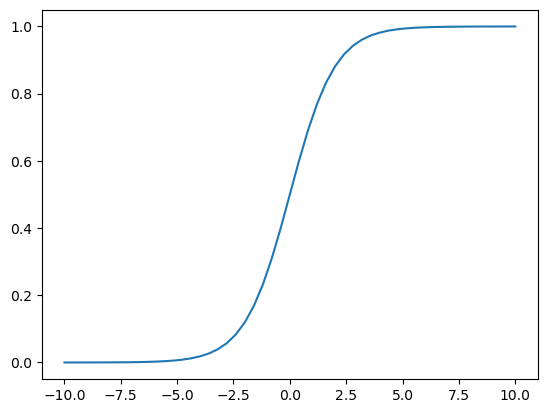

In [81]:
plt.plot(z, s)

In [82]:
def logistic_regression(xi, w0, w):
    score = w0
    for j in range(len(w)):
        score = score + xi[j] * w[j]
    return sigmoid(score)

In [84]:
from sklearn.linear_model import LogisticRegression

In [87]:
model = LogisticRegression(max_iter=10_000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [89]:
model.coef_[0] # weights are just one row

array([ 6.76630537e-01,  2.80327897e-02, -6.72567454e-01,  5.03634013e-02,
       -1.82675284e-02,  1.10216718e-01, -1.56586406e-01,  7.84655611e-02,
        3.52144737e-02, -3.11860084e-03, -4.91357663e-01,  6.80039942e-01,
       -1.56586406e-01, -1.67757579e-02, -1.91304979e-01,  7.19778330e-02,
        1.51423019e-01,  1.13519003e-01, -1.56586406e-01,  7.51632756e-02,
        2.81696257e-01, -1.56586406e-01, -9.30139783e-02, -1.66024420e-01,
        1.98120293e-01, -4.72261364e-02,  7.93220094e-02, -5.52356774e-02,
       -6.04458677e-03,  1.04322042e-01, -1.09459054e-02,  7.19778330e-02,
       -3.98819600e-02,  1.94231574e-01, -9.44709214e-02, -1.56586406e-01,
        2.83153200e-01, -5.45311790e-02, -1.56586406e-01,  2.43213458e-01,
        2.31534041e-01, -1.56586406e-01, -4.28517616e-02, -6.84080218e-02,
        3.94041318e-04])

In [90]:
model.intercept_[0]

np.float64(-0.05005078279271729)

In [91]:
model.predict(X_train) # hard predictions

array([0, 1, 1, ..., 1, 0, 1])

In [92]:
model.predict_proba(X_train) # soft predictions

array([[0.92630828, 0.07369172],
       [0.32373392, 0.67626608],
       [0.36904392, 0.63095608],
       ...,
       [0.48775145, 0.51224855],
       [0.97417878, 0.02582122],
       [0.30568812, 0.69431188]])

In [94]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred # churn probabilities for each customer in validation set

array([0.00671805, 0.20511555, 0.21764562, ..., 0.15102051, 0.78893226,
       0.81183142])

In [100]:
churn_decision = y_pred >= 0.5 # hard predictions with custom threshold
churn_decision

array([False, False, False, ..., False,  True,  True])

In [101]:
df_val[churn_decision].head(5)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
24,2612-ranwt,female,0,no,no,12,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,bank_transfer_(automatic),100.15,1164.30


In [102]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [103]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [106]:
acc = y_val == churn_decision.astype(int)
acc

array([ True,  True,  True, ...,  True,  True,  True])

In [107]:
acc.mean()

np.float64(0.8041163946061036)

In [108]:
df_pred = pd.DataFrame()
df_pred["probability"] = y_pred
df_pred["prediction"] = churn_decision.astype(int)
df_pred["actual"] = y_val

In [109]:
df_pred

,probability,prediction,actual
0,0.006718,0,0
1,0.205116,0,0
2,0.217646,0,0
3,0.564380,1,1
4,0.217887,0,0
...,...,...,...
1404,0.292346,0,0
1405,0.041090,0,1
1406,0.151021,0,0
1407,0.788932,1,1


In [110]:
df_pred["correct"] = df_pred.prediction == df_pred.actual

In [111]:
df_pred

,probability,prediction,actual,correct
0,0.006718,0,0,True
1,0.205116,0,0,True
2,0.217646,0,0,True
3,0.564380,1,1,True
4,0.217887,0,0,True
...,...,...,...,...
1404,0.292346,0,0,True
1405,0.041090,0,1,False
1406,0.151021,0,0,True
1407,0.788932,1,1,True


In [112]:
df_pred["correct"].sum()

np.int64(1133)

In [113]:
df_pred["correct"].mean()

np.float64(0.8041163946061036)

In [114]:
df_pred["correct"].sum() / len(df_pred)

np.float64(0.8041163946061036)

## Interpreting

In [115]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [116]:
model.coef_[0].round(3)

array([ 0.677,  0.028, -0.673,  0.05 , -0.018,  0.11 , -0.157,  0.078,
        0.035, -0.003, -0.491,  0.68 , -0.157, -0.017, -0.191,  0.072,
        0.151,  0.114, -0.157,  0.075,  0.282, -0.157, -0.093, -0.166,
        0.198, -0.047,  0.079, -0.055, -0.006,  0.104, -0.011,  0.072,
       -0.04 ,  0.194, -0.094, -0.157,  0.283, -0.055, -0.157,  0.243,
        0.232, -0.157, -0.043, -0.068,  0.   ])

In [119]:
features = dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))
features

{'contract=month-to-month': np.float64(0.677),
 'contract=one_year': np.float64(0.028),
 'contract=two_year': np.float64(-0.673),
 'dependents=no': np.float64(0.05),
 'dependents=yes': np.float64(-0.018),
 'deviceprotection=no': np.float64(0.11),
 'deviceprotection=no_internet_service': np.float64(-0.157),
 'deviceprotection=yes': np.float64(0.078),
 'gender=female': np.float64(0.035),
 'gender=male': np.float64(-0.003),
 'internetservice=dsl': np.float64(-0.491),
 'internetservice=fiber_optic': np.float64(0.68),
 'internetservice=no': np.float64(-0.157),
 'monthlycharges': np.float64(-0.017),
 'multiplelines=no': np.float64(-0.191),
 'multiplelines=no_phone_service': np.float64(0.072),
 'multiplelines=yes': np.float64(0.151),
 'onlinebackup=no': np.float64(0.114),
 'onlinebackup=no_internet_service': np.float64(-0.157),
 'onlinebackup=yes': np.float64(0.075),
 'onlinesecurity=no': np.float64(0.282),
 'onlinesecurity=no_internet_service': np.float64(-0.157),
 'onlinesecurity=yes': np.f

In [120]:
# training a smaller model with limited subset of features

small = ["contract", "tenure", "monthlycharges"]

df_train[small].iloc[:10]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
5,month-to-month,4,30.50
6,month-to-month,1,75.10
7,month-to-month,1,70.30
8,two_year,72,19.75
9,month-to-month,6,109.90


In [121]:
df_train[small].iloc[:10].to_dict(orient="records")

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [125]:
dicts_train_small = df_train[small].to_dict(orient="records")
dicts_val_small = df_val[small].to_dict(orient="records")
dv_small = DictVectorizer(sparse=False)

dv_small.fit(dicts_train_small)
X_small_train = dv_small.transform(dicts_train_small)
X_small_val = dv_small.transform(dicts_val_small)

In [124]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [130]:
model_small = LogisticRegression(max_iter=10_000)
model_small.fit(X_small_train, y_train)

LogisticRegression(max_iter=10000)

In [132]:
w = model_small.coef_[0].round(3)
w0 =model_small.intercept_[0].round(3)
w, w0

(array([ 0.971, -0.024, -0.948,  0.027, -0.036]), np.float64(-2.478))

In [133]:
features_small = dict(zip(dv_small.get_feature_names_out(), w))
features_small

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [134]:
# intercept as sigmoid threshold
sigmoid(w0) # about 8% base probability of churning

np.float64(0.07741492517290238)

## Using model

In [141]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [167]:
dv_full = DictVectorizer(sparse=False)

dicts_full_train = df_full_train[categorical + numerical].to_dict(orient="records")
X_full_train = dv_full.fit_transform(dicts_full_train)

In [168]:
model_full = LogisticRegression(max_iter=10_000)
model_full.fit(X_full_train, df_full_train.churn)

LogisticRegression(max_iter=10000)

In [169]:
features_full = dict(zip(dv_full.get_feature_names_out(), model_full.coef_[0].round(3)))
features_full

{'contract=month-to-month': np.float64(0.67),
 'contract=one_year': np.float64(0.032),
 'contract=two_year': np.float64(-0.737),
 'dependents=no': np.float64(0.012),
 'dependents=yes': np.float64(-0.048),
 'deviceprotection=no': np.float64(0.077),
 'deviceprotection=no_internet_service': np.float64(-0.151),
 'deviceprotection=yes': np.float64(0.038),
 'gender=female': np.float64(-0.003),
 'gender=male': np.float64(-0.033),
 'internetservice=dsl': np.float64(-0.452),
 'internetservice=fiber_optic': np.float64(0.567),
 'internetservice=no': np.float64(-0.151),
 'monthlycharges': np.float64(-0.01),
 'multiplelines=no': np.float64(-0.179),
 'multiplelines=no_phone_service': np.float64(0.043),
 'multiplelines=yes': np.float64(0.1),
 'onlinebackup=no': np.float64(0.125),
 'onlinebackup=no_internet_service': np.float64(-0.151),
 'onlinebackup=yes': np.float64(-0.01),
 'onlinesecurity=no': np.float64(0.223),
 'onlinesecurity=no_internet_service': np.float64(-0.151),
 'onlinesecurity=yes': np.f

In [170]:
dicts_test = df_test[categorical + numerical].to_dict(orient="records")
X_test = dv_full.transform(dicts_test)

In [171]:
test_probs = model_full.predict_proba(X_test)[:, 1]

In [172]:
test_probs

array([0.06795254, 0.09449748, 0.33447718, ..., 0.00511046, 0.20415491,
       0.64025909])

In [173]:
churn_decision_test = test_probs >= 0.5
churn_decision_test

array([False, False, False, ..., False, False,  True])

In [174]:
(churn_decision_test == y_test).mean()

np.float64(0.8126330731014905)

## Single point prediction

In [159]:
sample = dicts_test[10]
sample

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [165]:
X_sample = dv_full.transform([sample])
X_sample

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [166]:
model_full.predict_proba(X_sample)

array([[0.51972992, 0.48027008]])

In [175]:
y_test[10]

np.int64(0)